In [ ]:
!pip install -q sklearn

In [10]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [11]:
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np #allows u to do multi dimensional calculations like vector operations, matrices, matix addition nd subtractiomn also represent data in easier form
import pandas as pd # allows us to manipulate data,load in datasets, visualize datasets, cut off rows from datasets  its a data analytic too
import matplotlib.pyplot as plt # allows us to visualize graphs and charts
from IPython.display import clear_output #as the name implies
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [16]:
#training dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #training dataset link
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #testing dataset link
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [19]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [33]:
print (dftrain.loc[200],y_train[200])

sex                        female
age                          41.0
n_siblings_spouses              0
parch                           1
fare                         19.5
class                      Second
deck                      unknown
embark_town           Southampton
alone                           n
Name: 200, dtype: object 1


In [35]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [41]:
dftrain.shape

(627, 9)

In [42]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

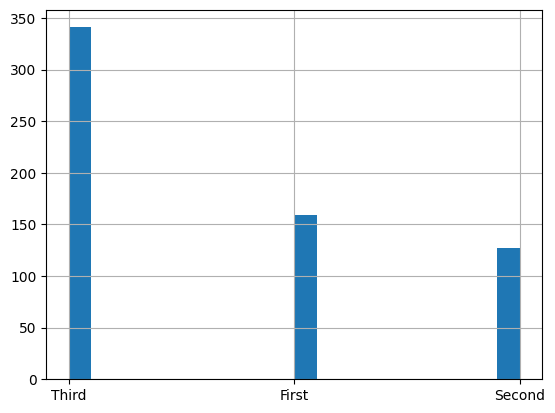

In [63]:
dftrain['class'].hist(bins=20)

<Axes: >

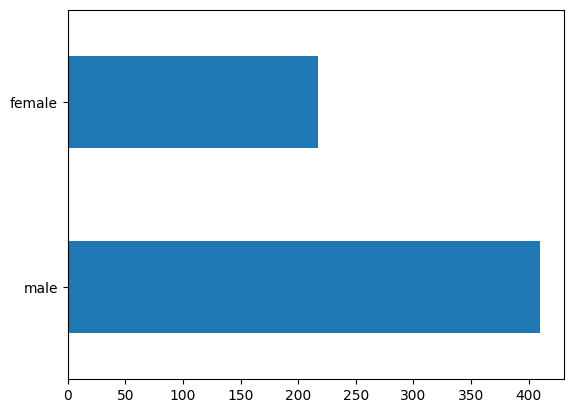

In [58]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

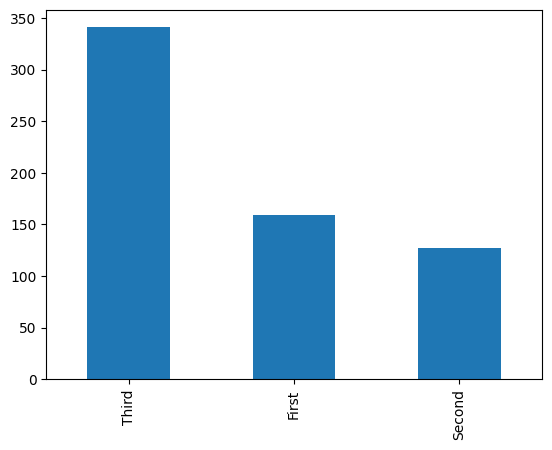

In [65]:
dftrain['class'].value_counts().plot(kind='bar')

Text(0.5, 0, '%survive')

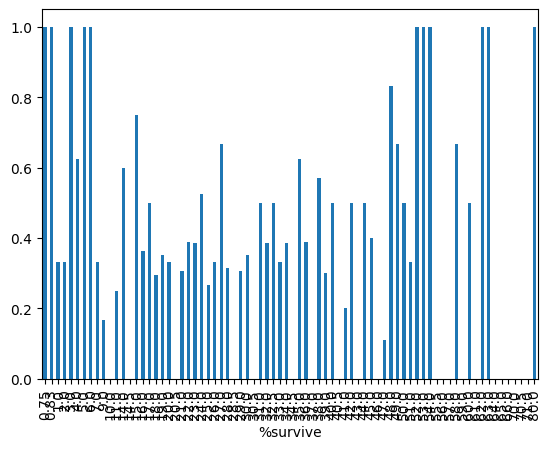

In [85]:
pd.concat([dftrain,y_train],axis=1).groupby ('sex').survived.mean().plot(kind='bar').set_xlabel('%survive')